<a href="https://colab.research.google.com/github/hashir001/Sentiment-Analysis-FIFA-2022-World-Cup/blob/main/Python_FIFA_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install & Mount Drive



In [ ]:
!pip install tweepy
!pip install gradio
!pip install transformers
from transformers import pipeline
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 2.2 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 106 kB 60.1 MB/s 
     |████████████████████████████████| 272 kB 67.7 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 2.3 MB 48.9 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 213 kB 57.3 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 7.1 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |██

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Get Data

In [ ]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/fifa_tweets.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/result.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/results.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Datasets/result_2.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Datasets/result_3.csv')


#df = df1 + df2 + df3 + df4 + df5
dfres = df1.append(df2,ignore_index = True)
dfres = dfres.append(df3,ignore_index = True)
dfres = dfres.append(df4,ignore_index = True)
dfres = dfres.append(df5,ignore_index = True)
df = dfres




qatar=['Qatar']
Germany=['Germany']
Denmark=['Denmark']
Brazil=['Brazil']
France=['France']
Belgium=['Belgium']
Croatia=['Croatia']
Spain=['Spain']
Serbia=['Serbia']
England=['England']
Switzerland=['Switzerland']
Netherlands=['Netherlands']
Argentina=['Argentina']
Iran=['Iran']
KoreaRepublic=['Korea Republic']
Japan=['Japan']
Saudi=['Saudi']
Ecuador=['Ecuador']
Uruguay=['Uruguay']
Canada=['Canada']
Ghana=['Ghana']
Senegal=['Senegal']
Portugal=['Portugal']
Poland=['Poland']
Tunisia=['Tunisia']
Morocco=['Morocco']
Cameroon=['Cameroon']
USA=['USA']
Mexico=['Mexico']
Wales=['Wales']
Australia=['Australia']
Costa=['Costa']




world_cup_refs = ['FIFA Cup 2022','World Cup 2022','Qatar World Cup','Qatar World Cup 2022','FIFA World Cup 2022','fifa cup 2022','world cup 2022','qatar world cup','qatar world cup 2022','world cup','World Cup','#WorldCup','#FIFAWorldCup','#WorldCup2022','FIFA World Cup 2022']

In [ ]:
df.shape

(8285, 6)

#Find Country References In DataFrame

In [ ]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['World Cup'] = df['content'].apply(lambda x: identify_subject(x, world_cup_refs)) 
df['Spain'] = df['content'].apply(lambda x: identify_subject(x, Spain)) 
df['Germany'] = df['content'].apply(lambda x: identify_subject(x,Germany )) 
df['Denmark'] = df['content'].apply(lambda x: identify_subject(x,Denmark )) 
df['Brazil'] = df['content'].apply(lambda x: identify_subject(x,Brazil )) 
df['France'] = df['content'].apply(lambda x: identify_subject(x,France )) 
df['Belgium'] = df['content'].apply(lambda x: identify_subject(x,Belgium)) 
df['Croatia'] = df['content'].apply(lambda x: identify_subject(x,Croatia )) 
df['Serbia'] = df['content'].apply(lambda x: identify_subject(x,Serbia )) 
df['England'] = df['content'].apply(lambda x: identify_subject(x,England)) 
df['Switzerland'] = df['content'].apply(lambda x: identify_subject(x,Switzerland )) 
df['Netherlands'] = df['content'].apply(lambda x: identify_subject(x,Netherlands )) 
df['Argentina'] = df['content'].apply(lambda x: identify_subject(x,Argentina )) 
df['Iran'] = df['content'].apply(lambda x: identify_subject(x,Iran )) 
df['Korea'] = df['content'].apply(lambda x: identify_subject(x,KoreaRepublic )) 
df['Japan'] = df['content'].apply(lambda x: identify_subject(x, Japan)) 
df['Saudi'] = df['content'].apply(lambda x: identify_subject(x, Saudi)) 
df['Ecuador'] = df['content'].apply(lambda x: identify_subject(x, Ecuador)) 
df['Uruguay'] = df['content'].apply(lambda x: identify_subject(x, Uruguay)) 
df['Canada'] = df['content'].apply(lambda x: identify_subject(x,Canada )) 
df['Ghana'] = df['content'].apply(lambda x: identify_subject(x,Ghana )) 
df['Senegal'] = df['content'].apply(lambda x: identify_subject(x, Senegal)) 
df['Portugal'] = df['content'].apply(lambda x: identify_subject(x, Portugal)) 
df['Poland'] = df['content'].apply(lambda x: identify_subject(x, Poland)) 
df['Tunisia'] = df['content'].apply(lambda x: identify_subject(x, Tunisia)) 
df['Morocco'] = df['content'].apply(lambda x: identify_subject(x, Morocco)) 
df['Cameroon'] = df['content'].apply(lambda x: identify_subject(x,Cameroon ))
df['USA'] = df['content'].apply(lambda x: identify_subject(x, USA)) 
df['Mexico'] = df['content'].apply(lambda x: identify_subject(x,Mexico )) 
df['Wales'] = df['content'].apply(lambda x: identify_subject(x, Wales)) 
df['Australia'] = df['content'].apply(lambda x: identify_subject(x, Australia)) 
df['Costa'] = df['content'].apply(lambda x: identify_subject(x, Costa)) 








In [ ]:
pd.concat([df[column].value_counts() for column in df], axis = 1)

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query,World Cup,Spain,Germany,Denmark,...,Portugal,Poland,Tunisia,Morocco,Cameroon,USA,Mexico,Wales,Australia,Costa
0,NaN,NaN,NaN,NaN,NaN,NaN,1877.0,8221.0,8191.0,8249.0,...,8190.0,8256.0,8251.0,8222.0,8250.0,8200.0,8244.0,8205.0,8265.0,8285.0
1,NaN,NaN,NaN,NaN,NaN,NaN,6408.0,64.0,94.0,36.0,...,95.0,29.0,34.0,63.0,35.0,85.0,41.0,80.0,20.0,NaN
"""Congratulations England""\n#WorldCup2022",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Don't miss out on the $GSD #WorldCup2022 Competition, fantastic prizes are to be won. Keep tabs on this page for more information about the competition and also join our discord server here⬇️\n\nhttps://t.co/LzcJShzTrL""",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Face ID""\n#missionary \n#Worldcup2022 #staracdemylive https://t.co/7pwDdTxmaj",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🧨Greedland is a #NFTGaming of #FIFAWorldCupQatar2022 Prize Quiz #NFTProjects. \n\n🎁There are a lots of surprising rewards once you make the correct predictions with #NFTMinting \n\n🎀#MintingSoon Who gonna be the final 16 from Group A of #FIFAWorldCup ? https://t.co/tqrjh7cucE,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🧨Greedland will issue DAVID'S CUP #NFT of #FIFAWorldCupQatar2022 and players who #Mint can share Prize Pool\n\n🎁You will get Big Surprising once you hold the correct winners' team with #NFTMinting \n\n🎀#MintingSoon So..Who gonna be the final 16 from Group B of #FIFAWorldCup? https://t.co/1Y02Xt764X,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🧵 The rundown on all twenty-six of our players that will be representing Switzerland (@nati_sfv_asf) at #FIFAWorldCup2022. \n\nA thread... 👇 https://t.co/Ul2Bd7UkCp,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🪄⚽️🔮@CROpperfieldCRO\n \n 💥Just Launched 💥\n⚽️ WORLD CUP BETTING DAPP ⚽️\n\n🪄 Bet on all match events of World Cup 2022 using #CRO \n\n⚽️⚡Dapp: https://t.co/pdmrSXYOmb\n\n🎩 Website: https://t.co/JRyYmpSvvw\n🔮Telegram:@Cropperfield\n\n#CROFAM #FFTB\n#FIFAWorldCupQatar2022 https://t.co/SaDq9ruOJM,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Preprocess

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT']

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['content'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query,World Cup,Spain,Germany,Denmark,...,Poland,Tunisia,Morocco,Cameroon,USA,Mexico,Wales,Australia,Costa,Processed Tweet
0,Tue Nov 15 18:11:41 +0000 2022,The giver of each country's largest ever footb...,https://twitter.com/2022_QatarWC,https://twitter.com/2022_QatarWC/status/159258...,2022-11-17T02:06:50.654Z,#WorldCup2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The giver country's largest ever football defe...
1,Wed Nov 16 18:47:09 +0000 2022,Argentina coach Scaloni: “There’s a possibilit...,https://twitter.com/FabrizioRomano,https://twitter.com/FabrizioRomano/status/1592...,2022-11-17T02:06:50.654Z,#WorldCup2022,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Argentina coach Scaloni: “There’s possibility ...
2,Wed Nov 16 19:19:46 +0000 2022,🇫🇷| William Saliba and France have arrived in ...,https://twitter.com/ArsenalBuzzCom,https://twitter.com/ArsenalBuzzCom/status/1592...,2022-11-17T02:06:50.655Z,#WorldCup2022,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"🇫🇷| William Saliba France arrived Doha, Qatar,..."
3,Tue Nov 01 06:39:00 +0000 2022,It’s officially World Cup month 🤩 https://t.co...,https://twitter.com/ESPNFC,https://twitter.com/ESPNFC/status/158733336578...,2022-11-17T02:06:50.655Z,#WorldCup2022,1,0,0,0,...,0,0,0,0,0,0,0,0,0,It’s officially World Cup month 🤩 https://t.co...
4,Wed Nov 16 17:03:35 +0000 2022,Put some respect on Gareth Bale's name 👏\n\n#W...,https://twitter.com/1xBet_Eng,https://twitter.com/1xBet_Eng/status/159292636...,2022-11-17T02:06:50.655Z,#WorldCup2022,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Put respect Gareth Bale's name 👏 #WorldCup2022...


#TextBlob - Calculate Sentiment 

In [ ]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'World Cup', 'polarity', 'subjectivity']].head()

,Processed Tweet,World Cup,polarity,subjectivity
0,The giver country's largest ever football defe...,0,0.0,0.0
1,Argentina coach Scaloni: “There’s possibility ...,1,0.0,0.0
2,"🇫🇷| William Saliba France arrived Doha, Qatar,...",1,0.0,0.0
3,It’s officially World Cup month 🤩 https://t.co...,1,0.0,0.0
4,Put respect Gareth Bale's name 👏 #WorldCup2022...,1,0.0,0.0


In [ ]:
display(df[df['World Cup']==1][['World Cup','polarity','subjectivity']].groupby('World Cup').agg([np.mean, np.max, np.min, np.median]))


polarity                  subjectivity                    
               mean amax amin median         mean amax amin    median
World Cup                                                            
1          0.157742  1.0 -1.0    0.0      0.34083  1.0  0.0  0.366667

In [ ]:
cup = df[df['World Cup']==1][['tweetDate', 'polarity']]
cup = cup.sort_values(by='tweetDate', ascending=True)
#MA: Moving Average 
cup['MA Polarity'] = cup.polarity.rolling(10, min_periods=3).mean()



In [ ]:
list_2022 = ['World Cup','Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'Korea', 'Japan', 'Saudi','Iran', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa']
a = {}
k = 0
for word in list_2022:
    # dynamically create key
    key = word
    # calculate value
    value = df[df[word]==1][['tweetDate', 'polarity']]
    value = cup.sort_values(by='tweetDate', ascending=True)
    a[key] = value 
    

#TextBlob - Visualization & Gradio

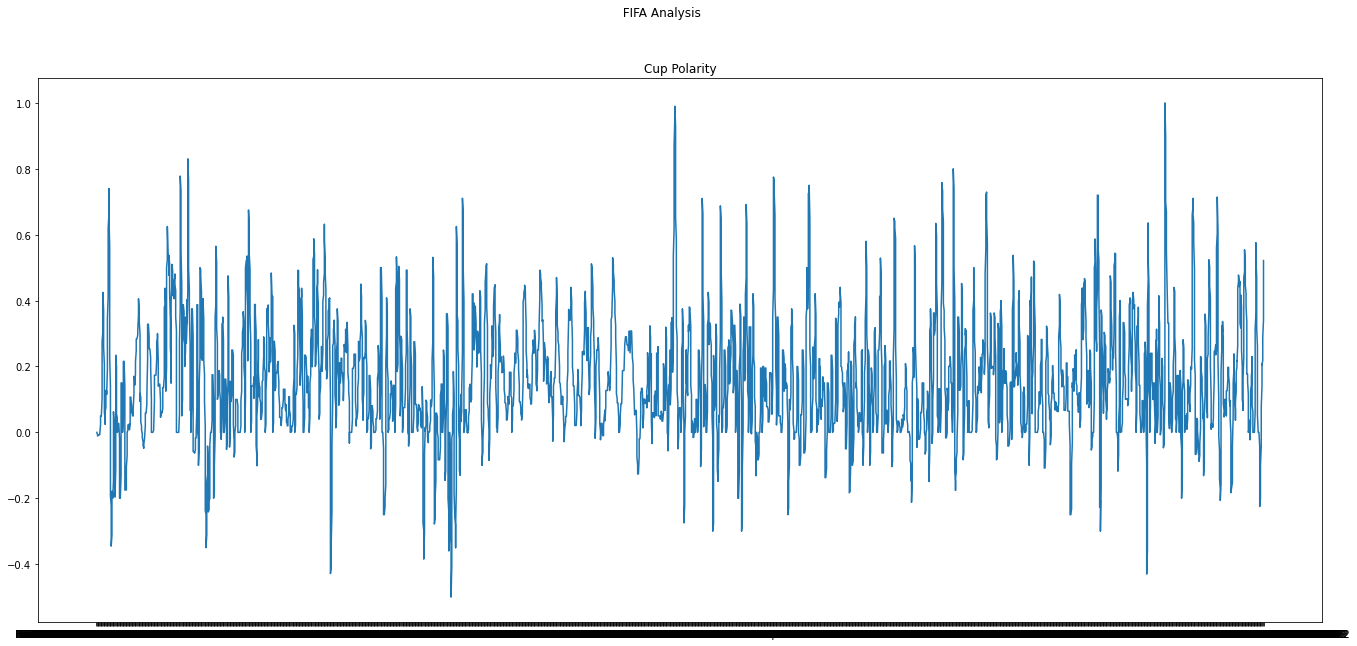

In [ ]:
demo = 'blue'
fig, axes = plt.subplots(1, 1, figsize=(23, 10))

axes.plot(cup['tweetDate'], cup['MA Polarity'])
axes.set_title("\n".join(["Cup Polarity"]))

fig.suptitle("\n".join([" FIFA Analysis"]), y=0.98)

#plt.show()

def returnPlot():
  return fig


In [ ]:

output = gr.Plot()

demo = gr.Interface(
    fn=returnPlot,
    inputs = None,
    outputs=output
)


demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

#Hugging Face (Main Approach Used)

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

###Apply Sentiment Pipeline To All Tweets
We run the cell on each 'Part Sentiment' while the others are commented out

In [ ]:
#df['Tweet Sentiment'] = df.iloc[0:2000:,38].apply(lambda x: sentiment_pipeline(x)[0]['label']) 
#df['Part Sentiment 2'] = df.iloc[2000:4000:,38].apply(lambda x: sentiment_pipeline(x)[0]['label']) 
#df['Part Sentiment 3'] = df.iloc[4000:6000:,38].apply(lambda x: sentiment_pipeline(x)[0]['label']) 
#df['Part Sentiment 4'] = df.iloc[6000:8000:,38].apply(lambda x: sentiment_pipeline(x)[0]['label']) 
df['Part Sentiment 5'] = df.iloc[8000:8284:,38].apply(lambda x: sentiment_pipeline(x)[0]['label']) 



##Combine Columns Into One Column

In [ ]:
df.iloc[2000:4000:,41] = df.iloc[2000:4000:,42]
df.iloc[4000:6000:,41] = df.iloc[4000:6000:,43]
df.iloc[6000:8000:,41] = df.iloc[6000:8000:,44]
df.iloc[8000:8284:,41] = df.iloc[8000:8284:,45]


In [ ]:
df['Tweet Sentiment'].value_counts()

NEGATIVE    6312
POSITIVE    1972
Name: Tweet Sentiment, dtype: int64

##Visualization & Gradio Application 1 (Sentiment of All Teams)

In [ ]:
import seaborn as sns

In [ ]:
df[df['Spain']==1][['Spain','Tweet Sentiment']].value_counts()

Spain  Tweet Sentiment
1      NEGATIVE           43
       POSITIVE           21
dtype: int64

In [ ]:
df[df['Brazil']==1][['Brazil','Tweet Sentiment']].value_counts()

Brazil  Tweet Sentiment
1       NEGATIVE           163
        POSITIVE            63
dtype: int64

In [ ]:
df[df['USA']==1][['USA','Tweet Sentiment']].value_counts()

USA  Tweet Sentiment
1    NEGATIVE           75
     POSITIVE           10
dtype: int64

In [ ]:
def returnPlt(Team):
  fig2 = plt.figure()
  sns.countplot('Tweet Sentiment', data = df[df[Team]==1][[Team,'Tweet Sentiment']])
  return fig2

In [ ]:
input = [
    gr.Dropdown(list_2022, label="Select")
]

In [ ]:
output = gr.Plot()

demo = gr.Interface(
    fn=returnPlt,
    inputs = input,
    outputs=output
)


demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>